In [18]:
import tensorflow as tf

import tensorflow_datasets as tfds
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (   Dense, 
                                        Conv2D, 
                                        Dropout,
                                        Flatten,
                                        MaxPooling2D,
                                        Rescaling,
                                    )

In [19]:
(x_train, y_train),(x_test, y_test) = tfds.as_numpy(tfds.load('mnist', 
                                                split=['train', 'test'], 
                                                batch_size=-1, 
                                                as_supervised=True, 
                                                shuffle_files=True 
                                                ))

# proper Type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


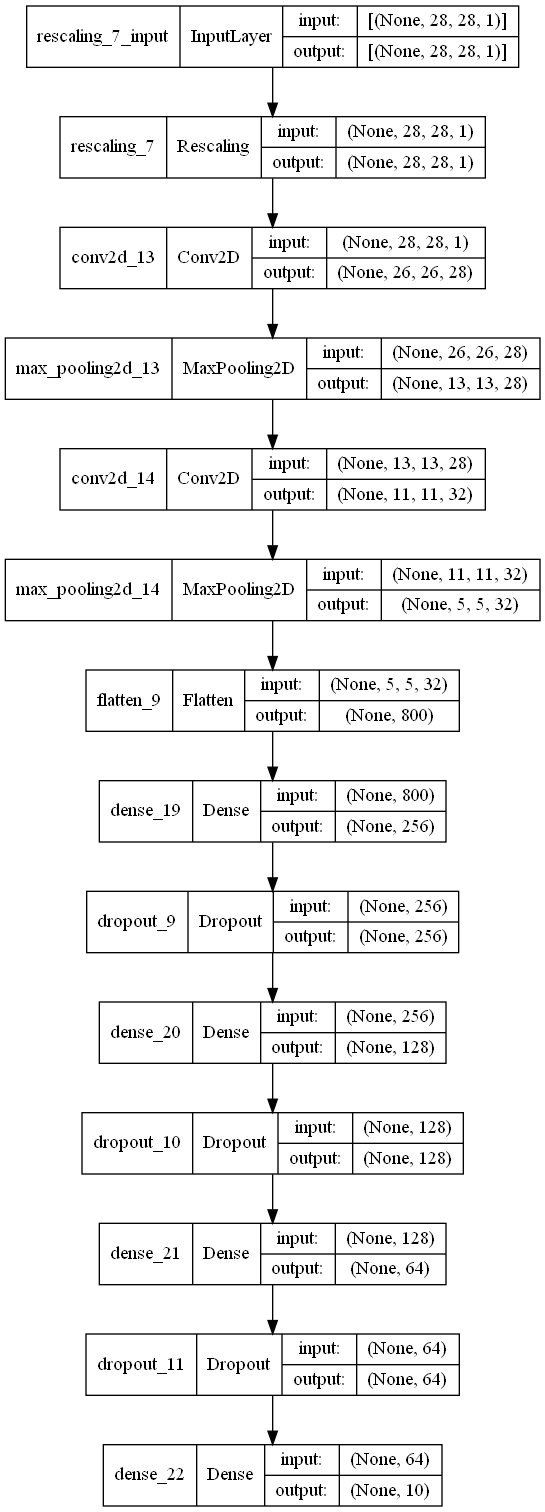

In [20]:
model = Sequential([
    # Rescaling
    Rescaling(1./255, input_shape=(28, 28, 1)),
    # First Convolutional
    Conv2D(filters=28, kernel_size=(3,3), activation=tf.nn.relu),
    MaxPooling2D(pool_size=(2,2)),
    # Second Convolutional
    Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu),
    MaxPooling2D(pool_size=(2,2)),
    # Flatten and Dense
    Flatten(),
    Dense(256,activation=tf.nn.relu), Dropout(0.3),
    Dense(128,activation=tf.nn.relu), Dropout(0.2),
    Dense(64,activation=tf.nn.relu),  Dropout(0.1),
    Dense(10,activation=tf.nn.softmax)
])

tf.keras.utils.plot_model(model, show_shapes=True)

In [21]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, name='Adam')
model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

history = model.fit(x=x_train, y=y_train, epochs=5, verbose=2, shuffle=True)

Epoch 1/5
1875/1875 [==============================] - 43s 22ms/step - loss: 0.2135 - accuracy: 0.9328
Epoch 2/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0698 - accuracy: 0.9804
Epoch 3/5
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0533 - accuracy: 0.9846
Epoch 4/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0433 - accuracy: 0.9879
Epoch 5/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0388 - accuracy: 0.9889


In [25]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.0315 - accuracy: 0.9908


[0.03150235489010811, 0.9908000230789185]